# Covid 19 Data analysis using python

### Imports

In [46]:
#import
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as plt

#dataset from data.world
df = pd.read_csv('datasets/time_series_covid19_confirmed_global.csv') 


In [64]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,918,922,925,925,925,937,939,939,944,955
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538


In [14]:
df.shape

(266, 203)

In [19]:
df.drop(["Lat", "Long"], axis = 1, inplace = True)

In [20]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015
1,NaN,Albania,0,0,0,0,0,0,0,0,...,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,918,922,925,925,925,937,939,939,944,955
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538


### Aggregating Rows by country

In [24]:
df_aggregated = df.groupby("Country/Region").sum()

In [25]:
df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015
Albania,0,0,0,0,0,0,0,0,0,0,...,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151
Algeria,0,0,0,0,0,0,0,0,0,0,...,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155
Andorra,0,0,0,0,0,0,0,0,0,0,...,918,922,925,925,925,937,939,939,944,955
Angola,0,0,0,0,0,0,0,0,0,0,...,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538


In [28]:
df_aggregated.shape

(188, 199)

### Visualising various country data
As we are well aware, it is in China'a Wuhan that the first corona virus case was recorded. If we take a look at the graph, we understand the first offical case was reported on 

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

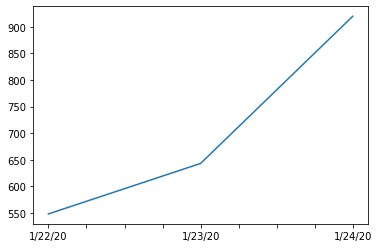

In [59]:
df_aggregated.loc['China'][:3].plot()



### Calculating and plotting first derivative of the curve

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

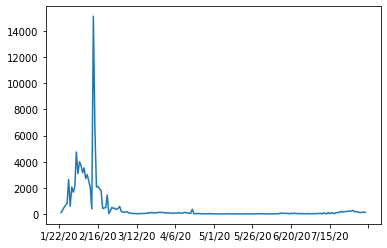

In [60]:
df_aggregated.loc['China'].diff().plot()

Now let's consired the maximun infection rate in the worst affceted and first hit countries - 
#### China, Italy and Spain


In [61]:
df_aggregated.loc['China'].diff().max()

15136.0

This means, 15,136 cases has been reported in 24 hours. Similarly for Italy and Spain.

In [62]:
df_aggregated.loc['Italy'].diff().max()

6557.0

In [63]:
df_aggregated.loc['Spain'].diff().max()

9630.0

### Maximum infection rate of all countries

In [68]:
countries = list(df_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(df_aggregated.loc[c].diff().max())

In [71]:
df_aggregated["max_affcted_rate"] = max_infection_rates

In [72]:
df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,max_affcted_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36542,36675,36710,36710,36747,36782,36829,36896,37015,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,5197,5276,5396,5519,5620,5750,5889,6016,6151,139.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,29831,30394,30950,31465,31972,32504,33055,33626,34155,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,922,925,925,925,937,939,939,944,955,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,1109,1148,1164,1199,1280,1344,1395,1483,1538,88.0


In [75]:
corona_data = pd.DataFrame(df_aggregated["max_affcted_rate"])

In [76]:
corona_data.head()

,max_affcted_rate
Country/Region,
Afghanistan,915.0
Albania,139.0
Algeria,675.0
Andorra,79.0
Angola,88.0


/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

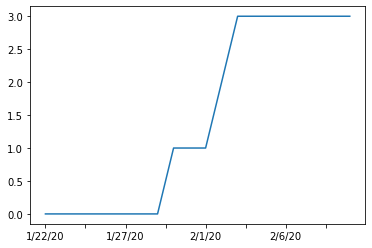

In [54]:
df_aggregated.loc['India'][:20].plot()


As you can see, India's corona grap has taken logarthimic increase.

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

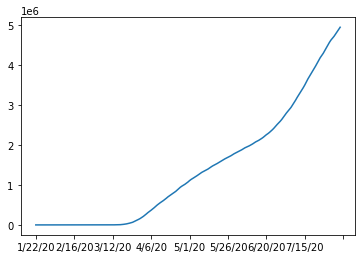

In [51]:
df_aggregated.loc['US'].plot()
